In [1]:
import pandas as pd
data_malware = pd.read_csv('dataset_malwares.csv')
data_malware = data_malware.drop(columns=['Name'])

In [2]:
data_malware.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,23117,144,3,0,4,0,65535,0,184,0,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,23117,144,3,0,4,0,65535,0,184,0,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,23117,144,3,0,4,0,65535,0,184,0,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,23117,144,3,0,4,0,65535,0,184,0,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [3]:
data_malware.shape

(19611, 78)

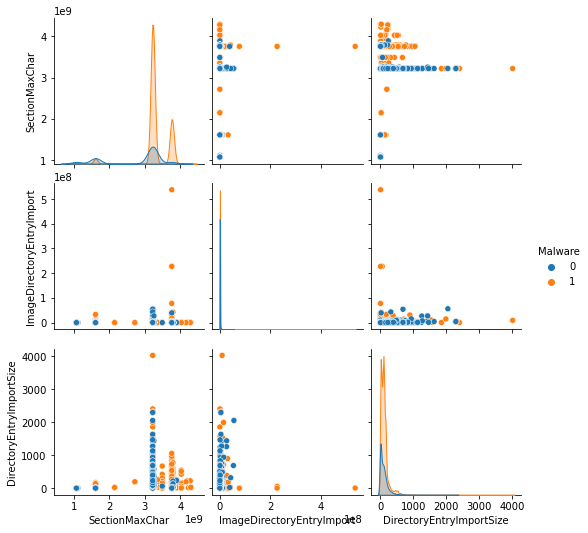

In [4]:
import seaborn as sns
sns.pairplot(data_malware[['SectionMaxChar','ImageDirectoryEntryImport','DirectoryEntryImportSize','Malware']],hue='Malware')

In [5]:
from sklearn.svm import SVC
svm = SVC(C=10,kernel='rbf')

In [6]:
y = data_malware['Malware']
X = data_malware.drop(columns = ['Malware'])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
print(X_scaler)

[[ 0.         -0.03506542 -0.04751096 ... -0.07054894 -0.0198525
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ... -0.03849221 -0.02110877
  -0.02469983]
 [ 0.         -0.03506542 -0.04751096 ... -0.07599254 -0.02110877
  -0.04066791]
 ...
 [ 0.         -0.18093613 -0.04958686 ... -0.07296832 -0.02110877
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ... -0.06691988 -0.02110877
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ...  0.00021781 -0.02110877
  -0.04066791]]


In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, Y_train, Y_validation = train_test_split(X_scaler, y, test_size=0.20, random_state=1, shuffle=True)

In [9]:
svm.fit(X_train,Y_train)

SVC(C=10)

In [10]:
y_pred_svm = svm.predict(X_validation)

In [64]:
import tensorflow as tf
from keras import *
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train[0])]), 
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1,activation='tanh')])
model.compile(loss='binary_crossentropy',optimizer='ADAM',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                4992      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
491/491 [==============================] - 2s 3ms/step - loss: 0.2862 - accuracy: 0.9254: 0s - loss: 0.3555 -  - ETA: 0s - loss: 0.3009 - accuracy
Epoch 2/10
491/491 [==============================] - 1s 2ms/step - loss: 0.1465 - accuracy: 0.9678
Epoch 3/10
491/491 [==============================] - 1s 2ms/step - loss: 0.1422 - accuracy: 0.9723: 0s - loss: 0.1514 - accu - ETA: 0s - loss: 0.144
Epoch 4/10
491/491 [==============================] - 1s 2ms/step - loss: 0.1610 - accuracy: 0.9642: 0s - loss: 0.1447 - accura
Epoch 5/10
491/491 [==============================] - 1s 2ms/step - loss: 0.1233 - accuracy: 0.9700
Epoch 6/10
491/491 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9727
Epoch 7/10
491/491 [==============================] - 1s 2ms/step - loss: 0.0888 - accuracy: 0.9788
Epoch 8/10
491/491 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9779
Epoch 9/10
491/491 [==============================] - 1s 2ms/ste

In [61]:
import numpy as np
y_pred_dnn = np.ceil(model.predict(X_validation).flatten())
#Transformar a entero las predicciones
y_pred_dnn_int = [abs(y) for y in y_pred_dnn]

In [14]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report 
print(classification_report(y_pred_svm,Y_validation))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       951
           1       0.99      0.98      0.99      2972

    accuracy                           0.98      3923
   macro avg       0.97      0.98      0.97      3923
weighted avg       0.98      0.98      0.98      3923



In [62]:
print(classification_report(y_pred_dnn_int,Y_validation))

              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88       785
         1.0       1.00      0.93      0.97      3138

    accuracy                           0.95      3923
   macro avg       0.90      0.96      0.92      3923
weighted avg       0.96      0.95      0.95      3923



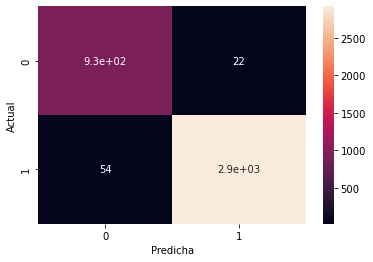

In [17]:
import matplotlib.pyplot as plt
df_svm = pd.DataFrame([y_pred_svm,Y_validation.values]).T
df_svm.columns=['y_Actual','y_Predicha']
confusion_matrix = pd.crosstab(df_svm['y_Actual'], df_svm['y_Predicha'], rownames=['Actual'], colnames=['Predicha'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

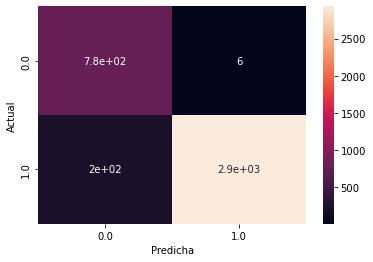

In [63]:
df_dnn = pd.DataFrame([y_pred_dnn_int,Y_validation.values]).T
df_dnn.columns=['y_Actual','y_Predicha']
confusion_matrix = pd.crosstab(df_dnn['y_Actual'], df_dnn['y_Predicha'], rownames=['Actual'], colnames=['Predicha'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()